In [1]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
filename = './weather_data/training_data_with_weather_info_week_3.csv'
weather_df = pd.read_csv(filename)
weather_df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,country+province,Lat,Long,day_from_jan_first,...,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0,Afghanistan-,33.0,65.0,22,...,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0,Afghanistan-,33.0,65.0,23,...,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0,Afghanistan-,33.0,65.0,24,...,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0,Afghanistan-,33.0,65.0,25,...,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0,Afghanistan-,33.0,65.0,26,...,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1


In [89]:
def plot_confirmed_by_day(country):
    plt.figure(figsize=(20, 10))
    df = weather_df[weather_df['Country_Region']==country]
    df = df.groupby(['Date']).agg({'ConfirmedCases':'sum','temp':'mean'}).reset_index()
    df['increase'] = df['ConfirmedCases'] - df['ConfirmedCases'].shift(1)
    sns.lineplot(data=df.set_index('Date')[['ConfirmedCases', 'increase']]).set_title('Time Series of COVID-19 cases in {}'.format(country),fontsize=20)
    plt.xticks(rotation=45)

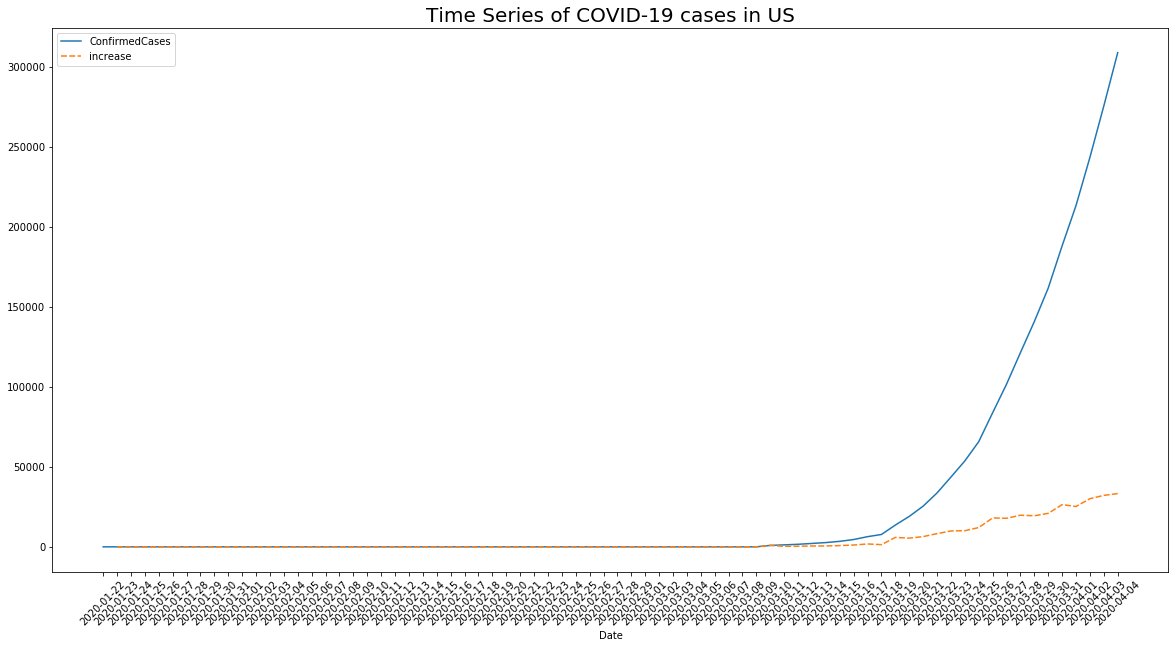

In [90]:
plot_confirmed_by_day('US')

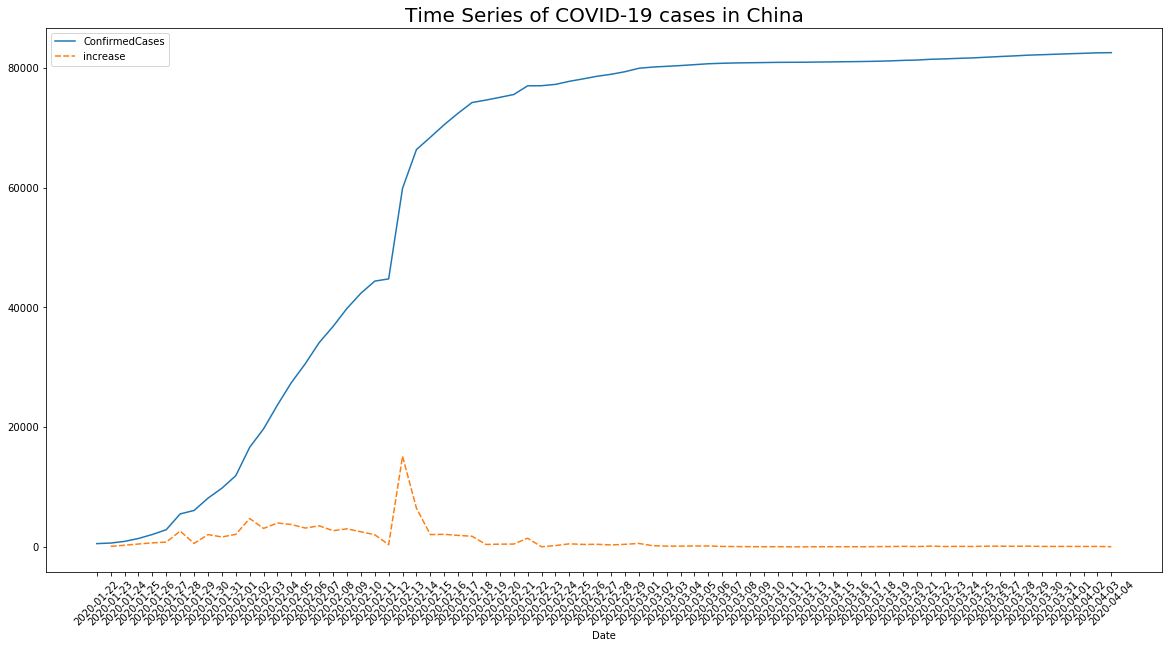

In [98]:
plot_confirmed_by_day('China')

In [93]:
def plot_temp_by_day(country):
    plt.figure(figsize=(20, 10))
    df = weather_df[weather_df['Country_Region']==country]
    df = df.groupby(['Date']).agg({'temp':'mean', 'min': 'min', 'max':'max'}).reset_index()
    sns.lineplot(data=df.set_index('Date')[['temp', 'min', 'max']]).set_title('Time Series of temperature in {}'.format(country),fontsize=20)
    plt.xticks(rotation=45)

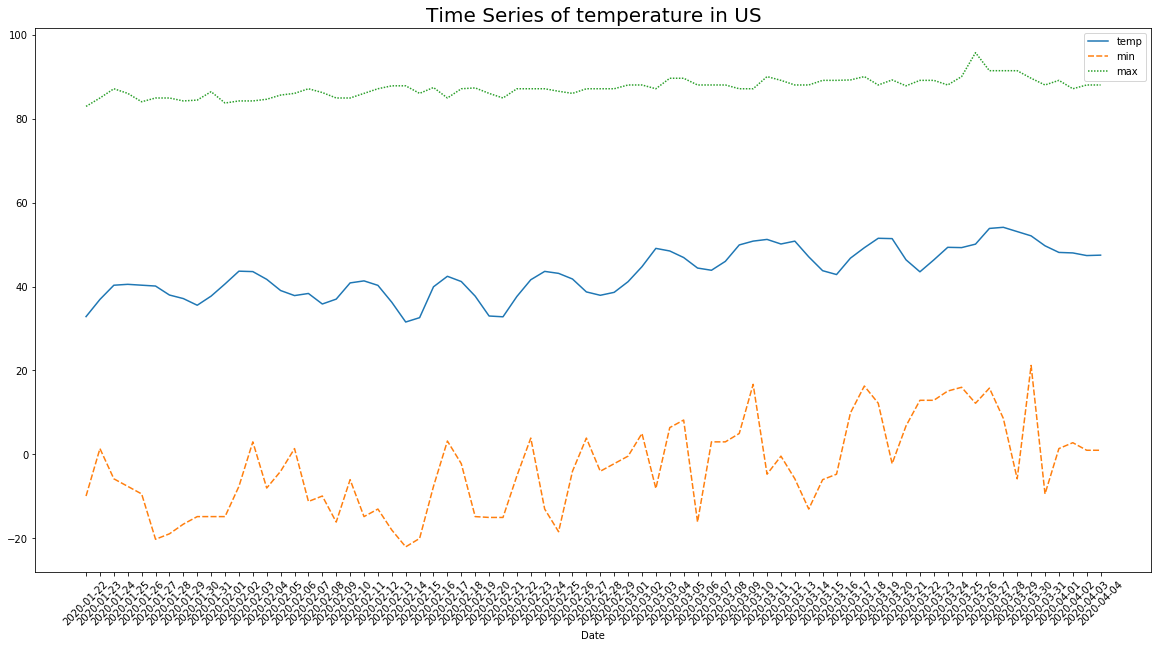

In [94]:
plot_temp_by_day('US')